In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = ""
os.environ['KAGGLE_KEY'] = ""
!pip install kaggle
!kaggle datasets download -d zeinhajjali/unswnb15combined

unswnb15combined.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
!pip install -q keras
import keras

In [ ]:
!pip install -q scikit-learn

In [ ]:
!unzip unswnb15combined.zip
dataset = pd.read_csv('/content/combined.csv')
dataset.head()

Archive:  unswnb15combined.zip
replace UNSW_NB15_testing-set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: UNSW_NB15_testing-set.csv  
  inflating: UNSW_NB15_training-set.csv  
  inflating: combined.arff           
  inflating: combined.csv            


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0.0,0.0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0.0,0.0,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0.0,0.0,0,7,9,1,1,1,1,1,NaN,0


In [ ]:
dataset.shape

(2540047, 49)

In [ ]:
dataset.columns = dataset.columns.str.replace(' ', '')
dataset['srcip'] = dataset['srcip'].str.strip()
dataset['sport'] = dataset['sport'].str.strip()
dataset['dstip'] = dataset['dstip'].str.strip()
dataset['dsport'] = dataset['dsport'].str.strip()
dataset['proto'] = dataset['proto'].str.strip()
dataset['state'] = dataset['state'].str.strip()
dataset['service'] = dataset['service'].str.strip()
dataset['ct_ftp_cmd'] = dataset['ct_ftp_cmd'].str.strip()
dataset.loc[(dataset.ct_ftp_cmd.isnull()), 'ct_ftp_cmd'] = 0
dataset.loc[(dataset.ct_ftp_cmd == ''), 'ct_ftp_cmd'] = 0
dataset['ct_ftp_cmd'] = dataset['ct_ftp_cmd'].astype(int)
dataset['attack_cat'] = dataset['attack_cat'].str.strip()
dataset.loc[(dataset.Label == 0), 'attack_cat'] = 'Normal'

dataset.drop_duplicates()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,NaN,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.937500,6.218009e+05,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,3,7,1,3,1,1,1,Normal,0
1,59.166.0.0,NaN,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.085940,5.048017e+04,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005000,7.564333,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,2,4,2,3,1,1,2,Normal,0
2,59.166.0.6,NaN,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.531300,6.362824e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,12,8,1,2,2,1,1,Normal,0
3,59.166.0.5,NaN,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.562500,5.425972e+05,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043000,0.014000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,6,9,1,1,1,1,1,Normal,0
4,59.166.0.3,NaN,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.250000,6.090676e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005000,0.003000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,7,9,1,1,1,1,1,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540039,59.166.0.1,NaN,149.171.126.9,NaN,tcp,CON,0.564998,14106,772406,31,29,2,262,http,198981.250000,1.091598e+07,262,526,255,255,162243658,163257853,54,1468,1,372266,116.321921,69.874077,1424262068,1424262069,2.123130,1.075171,0.000669,0.000530,0.000139,0,0,2.0,NaN,0,1,1,4,2,2,2,2,Normal,0
2540041,59.166.0.1,NaN,149.171.126.9,NaN,tcp,CON,0.564998,14106,772406,31,29,2,262,-,198981.250000,1.091598e+07,262,526,255,255,162243658,163257853,54,1468,1,372266,116.321921,69.874077,1424262068,1424262069,2.123130,1.075171,0.000669,0.000530,0.000139,0,0,2.0,NaN,0,2,1,4,2,2,2,2,Normal,0
2540042,59.166.0.5,NaN,149.171.126.7,NaN,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,24465.671880,1.466108e+05,6,8,255,255,4035116044,222196311,53,229,0,0,1221.136547,30.096029,1424262068,1424262069,17.394400,12.405143,0.000608,0.000468,0.000140,0,0,NaN,NaN,0,1,2,3,3,1,1,3,Normal,0
2540045,59.166.0.9,NaN,149.171.126.0,NaN,tcp,CON,2.200934,3498,166054,31,29,2,57,http,12496.513670,5.983751e+05,58,116,255,255,1289728069,3436097151,60,1432,1,79745,2868.893137,1951.035944,1424262067,1424262069,38.609700,19.133826,0.000680,0.000541,0.000139,0,0,2.0,NaN,0,1,1,2,4,2,2,2,Normal,0


In [ ]:
dataset.shape

(2540047, 49)

In [ ]:
print(dataset['srcip'].unique())
print(dataset['sport'].unique())
print(dataset['dstip'].unique())
print(dataset['dsport'].unique())
print(dataset['proto'].unique())
print(dataset['state'].unique())
print(dataset['service'].unique())
print(dataset['attack_cat'].unique())

['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.17' '149.171.126.19' '149.171.126.9'
 '149.171.126.8' '149.171.126.7' '149.171.126.15' '149.171.126.6'
 '149.171.126.0' '149.171.126.1' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.10' '149.171.126.18' '127.0.0.1'
 '149.171.126.14' '10.40.85.10' '10.40.182.6']
[nan '30597' '56866' ... '47629' '13366' '27282']
['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2'
 '149.171.126.1' '149.171.126.10' '149.171.126.3' '149.171.126.15'
 '149.171.126.14' '149.171.126.1

In [ ]:
indexNames = dataset[dataset['srcip'] == '127.0.0.1' ].index
dataset.drop(indexNames, inplace=True)
dataset['srcip'].unique()

array(['59.166.0.0', '59.166.0.6', '59.166.0.5', '59.166.0.3',
       '10.40.182.3', '59.166.0.7', '10.40.170.2', '59.166.0.1',
       '59.166.0.2', '59.166.0.4', '175.45.176.3', '175.45.176.2',
       '175.45.176.0', '59.166.0.8', '59.166.0.9', '175.45.176.1',
       '10.40.182.1', '10.40.85.1', '192.168.241.243', '10.40.85.30',
       '149.171.126.16', '149.171.126.2', '149.171.126.11',
       '149.171.126.4', '149.171.126.5', '149.171.126.17',
       '149.171.126.19', '149.171.126.9', '149.171.126.8',
       '149.171.126.7', '149.171.126.15', '149.171.126.6',
       '149.171.126.0', '149.171.126.1', '149.171.126.3',
       '149.171.126.13', '149.171.126.12', '149.171.126.10',
       '149.171.126.18', '149.171.126.14', '10.40.85.10', '10.40.182.6'],
      dtype=object)

In [ ]:
dataset.loc[(dataset['service'] == '-'), 'service'] = ''
dataset.loc[(dataset['sport'].isnull()), 'sport'] = ''
dataset.loc[(dataset['dsport'].isnull()), 'dsport'] = ''
dataset.loc[(dataset['attack_cat'] == 'Backdoors'), 'attack_cat'] = 'Backdoor'
print(dataset['attack_cat'].unique())

['Normal' 'Exploits' 'Reconnaissance' 'DoS' 'Generic' 'Shellcode'
 'Fuzzers' 'Worms' 'Backdoor' 'Analysis']


In [ ]:
dataset.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,3,7,1,3,1,1,1,Normal,0
1,59.166.0.0,,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0.0,0.0,0,2,4,2,3,1,1,2,Normal,0
2,59.166.0.6,,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,12,8,1,2,2,1,1,Normal,0
3,59.166.0.5,,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0.0,0.0,0,6,9,1,1,1,1,1,Normal,0
4,59.166.0.3,,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0.0,0.0,0,7,9,1,1,1,1,1,Normal,0


In [ ]:
del dataset['srcip']
del dataset['dstip']
del dataset['Label']
del dataset['dbytes']
del dataset['ct_dst_ltm']
del dataset['sbytes']
del dataset['Sintpkt']
del dataset['ct_flw_http_mthd']
del dataset['res_bdy_len']
del dataset['is_sm_ips_ports']
del dataset['Dintpkt']
del dataset['ct_ftp_cmd']
del dataset['is_ftp_login']
del dataset['sport']
del dataset['ct_src_dport_ltm']

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from keras.utils import np_utils

# dataset_train, dataset_test = train_test_split(dataset, test_size=0.3)
# X is input features, Y is target features
# Y = dataset['attack_cat']
# X = dataset.loc[:, dataset.columns != 'attack_cat']

# skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 10)

dataset_train, dataset_test = train_test_split(dataset, test_size=0.4, stratify=dataset['attack_cat'])
dataset_test, dataset_val = train_test_split(dataset_test, test_size=0.25, stratify=dataset_test['attack_cat'])

**PLOT DISTRIBUTION OF TEST DATA BEFORE**

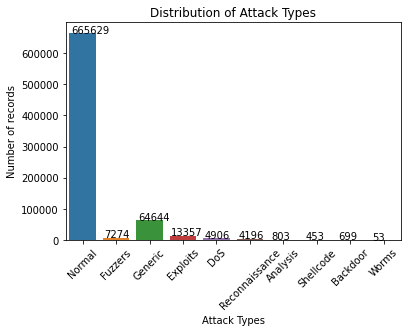

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
cat_ax = sns.countplot(data=dataset_test, x="attack_cat")
cat_ax.set_xticklabels(cat_ax.get_xticklabels(), rotation=45)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Types')
plt.ylabel('Number of records')
total = len(dataset)
for p in cat_ax.patches:
  #percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  percentage = p.get_height()
  x = p.get_x() + p.get_width() / 2 - 0.35
  #x = p.get_x() + p.get_width() + 0.02
  y = p.get_y() + p.get_height()
  cat_ax.annotate(percentage, (x, y))

plt.show()

**CONVERT DATA**

In [ ]:
cat_features = dataset.select_dtypes(include=['category', object]).columns
print(cat_features)

Index(['dsport', 'proto', 'state', 'service', 'attack_cat'], dtype='object')


In [ ]:
# Convert category types to numeric
from sklearn.preprocessing import LabelEncoder
LabelEnc = LabelEncoder()
dataset_train[cat_features] = dataset_train[cat_features].apply(LabelEnc.fit_transform)
dataset_test[cat_features] = dataset_test[cat_features].apply(LabelEnc.fit_transform)
dataset_val[cat_features] = dataset_val[cat_features].apply(LabelEnc.fit_transform)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**PLOT DISTRIBUTION OF TEST DATA AFTER**

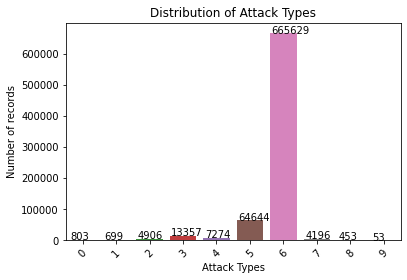

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
cat_ax = sns.countplot(data=dataset_test, x="attack_cat")
cat_ax.set_xticklabels(cat_ax.get_xticklabels(), rotation=45)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Types')
plt.ylabel('Number of records')
total = len(dataset)
for p in cat_ax.patches:
  #percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  percentage = p.get_height()
  x = p.get_x() + p.get_width() / 2 - 0.35
  #x = p.get_x() + p.get_width() + 0.02
  y = p.get_y() + p.get_height()
  cat_ax.annotate(percentage, (x, y))

plt.show()

In [ ]:
## ensure all data are floating point values
# dataset = X.astype('float32')

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [ ]:
# Normalize/Standardize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_train = dataset_train.loc[:, dataset.columns != 'attack_cat']
Y_train = dataset_train['attack_cat']

X_test = dataset_test.loc[:, dataset.columns != 'attack_cat']
Y_test = dataset_test['attack_cat']

X_val = dataset_val.loc[:, dataset.columns != 'attack_cat']
Y_val = dataset_val['attack_cat']

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.fit_transform(X_val)

In [ ]:
dataset_train['attack_cat'].shape

(1524027,)

In [ ]:
import time

VAL_ACC = []
VAL_LOSS = []
model_filename = 'sequential.model'
save_dir = '/content/'

Y_train = to_categorical(Y_train, num_classes=10)
Y_val = to_categorical(Y_val, num_classes=10)

# Construct the NN
model = Sequential()
model.add(Dense(10, input_dim = 33, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Compile
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint(save_dir+'modelCheckpoint.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

start_train = time.perf_counter()
history = model.fit(X_train_scaled, Y_train, epochs = 10, callbacks = callbacks_list, validation_data= (X_val_scaled, Y_val))
end_train = time.perf_counter()
training_time = end_train - start_train

Epoch 1/10
47609/47626 [============================>.] - ETA: 0s - loss: 0.0956 - accuracy: 0.9700
Epoch 00001: val_accuracy improved from -inf to 0.97077, saving model to /content/modelCheckpoint.h5
47626/47626 [==============================] - 63s 1ms/step - loss: 0.0956 - accuracy: 0.9700 - val_loss: 0.0984 - val_accuracy: 0.9708
Epoch 2/10
47590/47626 [============================>.] - ETA: 0s - loss: 0.1319 - accuracy: 0.9704
Epoch 00002: val_accuracy did not improve from 0.97077
47626/47626 [==============================] - 64s 1ms/step - loss: 0.1319 - accuracy: 0.9704 - val_loss: 0.1478 - val_accuracy: 0.9707
Epoch 3/10
47610/47626 [============================>.] - ETA: 0s - loss: 0.1472 - accuracy: 0.9699
Epoch 00003: val_accuracy did not improve from 0.97077
47626/47626 [==============================] - 65s 1ms/step - loss: 0.1472 - accuracy: 0.9699 - val_loss: 0.1105 - val_accuracy: 0.9683
Epoch 4/10
47626/47626 [==============================] - ETA: 0s - loss: 0.1865 

In [ ]:
dataset['attack_cat'].unique()

array(['Normal', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Fuzzers', 'Worms', 'Backdoor', 'Analysis'],
      dtype=object)

In [ ]:
#labels = LabelEnc.inverse_transform(dataset['attack_cat'])

In [ ]:
#labels

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

model.load_weights("modelCheckpoint.h5")

Y_test = np_utils.to_categorical(Y_test)

start_eval = time.perf_counter()
score = model.evaluate(X_test_scaled, Y_test)
end_eval = time.perf_counter()
eval_time = end_eval - start_eval

print(score)

start_pred = time.perf_counter()
y_pred = model.predict(X_test_scaled)
end_pred = time.perf_counter()
pred_time = end_pred - start_pred

y_pred = (y_pred > 0.5)
print(classification_report(np.argmax(Y_test, axis=1), np.argmax(y_pred, axis=1)))
conf_matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(conf_matrix)

print('Training time: ', training_time)
print('Evaluation time: ', eval_time)
print('Prediction time: ', pred_time)
print('number or predicitons: ', X_test_scaled.shape[0])

23813/23813 [==============================] - 23s 986us/step - loss: 0.1053 - accuracy: 0.9706
[0.10527121275663376, 0.9706448912620544]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.02      0.88      0.05       803
           1       0.00      0.00      0.00       699
           2       0.30      0.02      0.04      4906
           3       0.73      0.46      0.56     13357
           4       0.39      0.01      0.01      7274
           5       1.00      0.97      0.99     64644
           6       1.00      0.99      0.99    665629
           7       0.00      0.00      0.00      4196
           8       0.00      0.00      0.00       453
           9       0.00      0.00      0.00        53

    accuracy                           0.96    762014
   macro avg       0.34      0.33      0.26    762014
weighted avg       0.97      0.96      0.96    762014

[[   703      0     13     67      0      0     20      0      0      0]
 [   660      0     12     22      0      0      5      0      0      0]
 [  4102      0     92    651      4      3     54      0      0      0]
 [  6947      0    135